<a href="https://colab.research.google.com/github/mingeunjo/mini_game/blob/main/07_09_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# 라이브러리 불러오기
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data_2 = '/content/drive/MyDrive/ColabNotebooks/인사교6기_데이터분석/data/Carseats.csv'

In [12]:
data_1 = pd.read_csv(data_2)
data_1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [13]:
# 통계량 확인
data_1.describe()

# Sales는 TV, Radio, Newpaper에 영향을 받는 종속변수

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<Axes: title={'center': 'Price와 Advertising 간의 상관관계 및 회귀선'}, xlabel='Price', ylabel='Advertising'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) mi

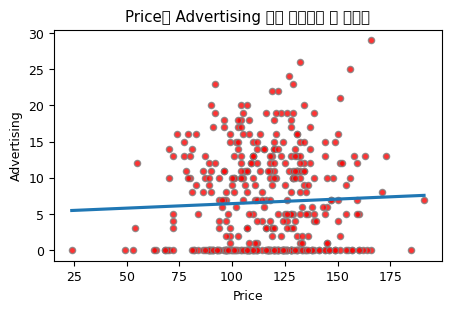

In [14]:
# 와 매출액과의 상관관계를 보여주는 산점도 및 추정 회귀선
plt.rcParams['figure.figsize'] = (5, 3) # 그림 크기를 전체적으로(globally) 설정
plt.rcParams.update({'font.size': 9}) # 그림 폰트를 전체적으로(globally) 설정
plt.title('Price와 Advertising 간의 상관관계 및 회귀선')  # 👈 제목 추가
#rcParams : matplotlib의 설정값 모음집 / rc : 'runtime configuration'의 약자

sns.regplot(x='Price', y='Advertising', data=data_1,
            order=1, ci=None, scatter_kws={'color' : 'r', 's' : 20, 'edgecolor' : 'grey'})
# regplot() : 데이터를 점으로 찍고, 그 위에 추세선을 그려주는 함수
# order=1 : 회귀선의 차수, 직선(1차식)

In [15]:
model = smf.ols('Price ~ Advertising', data=data_1)
olsfit = model.fit()
print(olsfit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7910
Date:                Wed, 09 Jul 2025   Prob (F-statistic):              0.374
Time:                        05:43:05   Log-Likelihood:                -1832.5
No. Observations:                 400   AIC:                             3669.
Df Residuals:                     398   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     114.7430      1.674     68.555      

In [16]:
model = smf.ols('Price ~ Advertising + CompPrice	+ Sales  ', data=data_1)
olsfit = model.fit()
print(olsfit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     210.6
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           1.19e-81
Time:                        05:43:05   Log-Likelihood:                -1642.1
No. Observations:                 400   AIC:                             3292.
Df Residuals:                     396   BIC:                             3308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      24.4089      6.283      3.885      

- 단순 회귀 모델로 봤을 때
R-squared: 약 0.002 ~ 0.347로 낮거나 중간 수준
주요 변수: CompPrice는 통계적으로 매우 유의했으나(p < 0.001), Advertising 등 다른 변수는 유의하지 않음
- 다중 회귀 모델로 봤을 때
R-squared: 0.615로 매우 높음 (61.5%의 가격 변동 설명)
주요 변수: Advertising, CompPrice, Sales 모두 통계적으로 유의미(p < 0.001)

결과 값이 나와서 단순 보다 다중이 더 유의미한 변수결과를 가진것을 알 수 있습니다